### Objective
To store a set of images using a minimal amount of data.

### Data
Obtained from Arabic Handwritten Digits Dataset | Kaggle (https://www.kaggle.com/datasets/mloey1/ahdd1), original source unknown.

### Problem Statement
You are working with a team that is developing a mobile app for doing arithmetic by hand, in Arabic. The app will recognize digits in the user's handwriting as part of its functionality. In order to use a minimum amount of data, your job as a developer is to store each hand-drawn digit using as little memory as possible. Using a dataset of hand drawn Arabic digits, you will train an autoencoder to encode and decode these images.

### Arabic Digits
Arabic digits correspond to Roman digits according to the table below (N.Das, A. Mollah, S. Saha, S. Haque, 2010, https://arxiv.org/abs/1003.1891):

## 1. Data

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import tensorflow libraries
from tensorflow.keras.layers import Input, Reshape, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten
from tensorflow.keras.models import Model

**a. Each row of *csvImages 10k x 784.csv* contains the gray scale values of a 28 x 28 image. Load this data into a pandas dataframe. Convert the dataframe to a numpy array using *pandas.values*. Print the shape of the data.**

In [4]:
# load dataset
digit_df = pd.read_csv('csvImages 10k x 784.csv', header=None)

In [5]:
# convert dataframe to numpy array
digits = digit_df.values

In [6]:
# print shape of data
digits.shape

(10000, 784)

**Discussion**
1. There are 9999 images.

**b. Normalize by dividing each value by 255. In order to display the images, reshape the array so each image is 28 x 28 using *numpy.ndarray.reshape*. Use *matplotlib.plot.imshow* and *matplotlib.plot.subplot* to give a plot of the first five images using the 'gray' colour map. In order to put the data back in the original shape for input to the neural network, reshape each image to be 784 (one-dimensional).**

In [7]:
# print data type
digits.dtype

dtype('int64')

In [8]:
# normalize data by dividing by 255. and convert to float32
digits = digits.astype('float32') / 255.

In [9]:
# reshape data for visualization
digits = digits.reshape(-1, 28, 28)

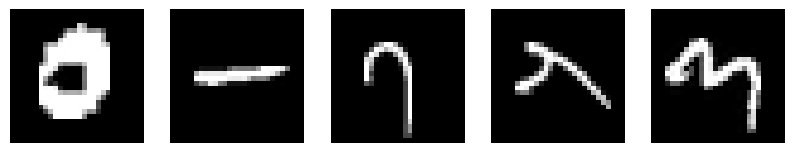

In [10]:
# display first 5 images
plt.figure(figsize=(10, 7))
for i in range(5):
    # Plot the original images
    plt.subplot(1, 5, i + 1)
    plt.imshow(digits[i], cmap='gray')
    plt.axis('off')

In [11]:
# reshape data for autoencoder
digits = digits.reshape(-1, 28**2)

## 2. Modeling

**a. Use *keras.layers* to create an input layer that matches the dimensions of your data.**

In [12]:
# display dimensions of data
digits.shape

(10000, 784)

In [13]:
# create the input layer that matches the dimension of the data
input_layer = Input(shape=(784,))

**b. Use *keras.layers* to create an encoding stage that has at least two layers and reduces the size of the data to 50% or less (less is better). You will need to choose activation functions.**

## Model 1

In [14]:
# create the encoding stage
m1_enc1 = Reshape((28, 28, 1))(input_layer)
m1_enc2 = Conv2D(8, (3, 3), activation='relu', padding='same')(m1_enc1)
m1_enc3 = MaxPooling2D((2, 2), padding='same')(m1_enc2)
m1_enc4 = Conv2D(8, (3, 3), activation='relu', padding='same')(m1_enc3)
m1_enc5 = MaxPooling2D((2, 2), padding='same')(m1_enc4)
m1_enc6 = Flatten()(m1_enc5)
m1_enc7 = Dense(49, activation='relu')(m1_enc6)
m1_encoder = Dense(9, activation='relu')(m1_enc7)

**Discussion**
1. Since the project is working on images, we may use convolutional neural networks in the autoencoder.
2. A multi-layer encoding stage is used.  
3. First we use *Reshape* to fit *Conv2D* input dimensions. Then, *Conv2D* with 8 filters of size 3 by 3 is used with a RuLU *activation* function, *padding* as *same* to maintain the shape of the input and the output.
4. *MaxPooling2D* is used to pool the information.
5. The *Conv2D* and the *MaxPooling2D* repeat one more time.
6. The *Flatten* layer is used to prepare for the *Dense* layer
7. The first Dense layer is 49 units.
8. The targeted encoder layer is of 9 units.
9. The overall reduction in size is 1-9/784 = 98.85%

**c. Use *keras.layers* to create a decoding stage that has at least two layers and restores the data to its original size. You will need to choose activation functions.**

In [15]:
# create the decoding stage
m1_dec1 = Dense(49, activation='relu')(m1_encoder)
m1_dec2 = Dense(392, activation='relu')(m1_dec1)
m1_dec3 = Reshape((7, 7, 8))(m1_dec2)
m1_dec4 = Conv2D(8, (3, 3), activation='relu', padding='same')(m1_dec3)
m1_dec5 = UpSampling2D((2, 2))(m1_dec4)
m1_dec6 = Conv2D(8, (3, 3), activation='relu', padding='same')(m1_dec5)
m1_dec7 = UpSampling2D((2, 2))(m1_dec6)
m1_dec8 = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(m1_dec7)
m1_decoder = Reshape((784,))(m1_dec8)

**Discussion**
1. A multi-layer decoding stage is used. The layers are in the reverse of those in encoding stage. We use *UpSampling2D* to restore the pooled information.
2. A RuLU activation function is used except the last decoder layer.
3. The *sigmoid* activation function is used because the input values to the network are only between 0 and 1.

**d. Compile the complete autoencoder network. You will need to choose a loss function and an optimizer. Train the autoencoder using the image data.**

In [16]:
# construct the autoencoder model by passing the first and last layers
autoencoder_1 = Model(input_layer, m1_decoder)

# print the summary
autoencoder_1.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         584       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 392)              

In [17]:
# compile the autoencoder model
autoencoder_1.compile(optimizer='adam', loss='binary_crossentropy')

# train the autoencoder model
autoencoder_1.fit(digits, digits, epochs=50, verbose=1)

Epoch 1/50
313/313 [==============================] - 4s 13ms/step - loss: 0.2707
Epoch 2/50
313/313 [==============================] - 5s 17ms/step - loss: 0.1623
Epoch 3/50
313/313 [==============================] - 6s 18ms/step - loss: 0.1338
Epoch 4/50
313/313 [==============================] - 5s 18ms/step - loss: 0.1231
Epoch 5/50
313/313 [==============================] - 6s 19ms/step - loss: 0.1173
Epoch 6/50
313/313 [==============================] - 7s 22ms/step - loss: 0.1133
Epoch 7/50
313/313 [==============================] - 6s 19ms/step - loss: 0.1104
Epoch 8/50
313/313 [==============================] - 6s 18ms/step - loss: 0.1082
Epoch 9/50
313/313 [==============================] - 6s 19ms/step - loss: 0.1064
Epoch 10/50
313/313 [==============================] - 6s 18ms/step - loss: 0.1050
Epoch 11/50
313/313 [==============================] - 6s 18ms/step - loss: 0.1039
Epoch 12/50
313/313 [==============================] - 6s 19ms/step - loss: 0.1028
Epoch 13/50
3

**Discussion**
1. The *binary_crossentropy* is used as the loss function.
2. The *adam* is used as the optimizer.
3. The images are passed as the input and also as the desired output. 

**e. Compile an encoder network from your trained input layer and encoding stage.**

In [18]:
# construct the encoder using input layer and encoding layer
encoder_1 = Model(input_layer, m1_encoder)

## 3. Conclusions

**a. Use *matplotlib.plot.imshow* and *matplotlib.plot.subplot* and your trained models to give a plot of the first five original images along the top row, the encoded versions of those same images along the second row, and the decoded versions along the bottom row.**

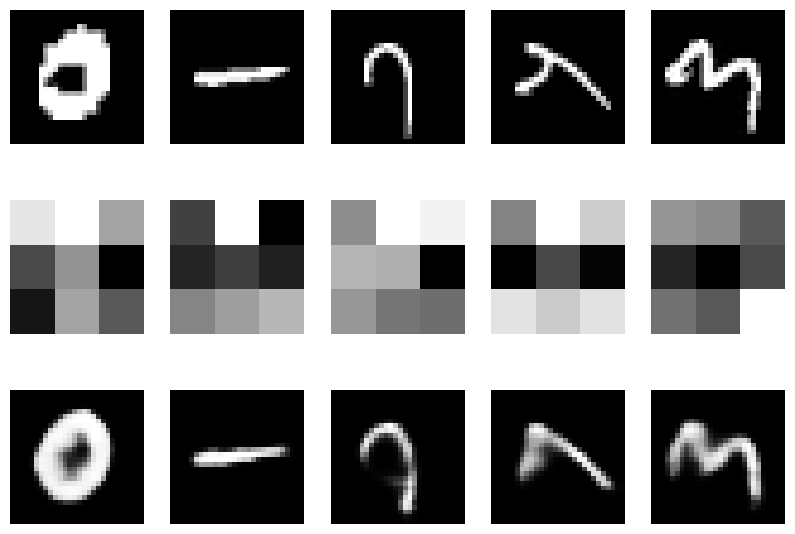

In [19]:
# obtain the original of the first 5 images
original = digits[:5]

# reshape the original images for visualization
original_1_vis = original.reshape(-1, 28, 28)

# obtain the encoder output of the first 5 images
encoder_1_output = encoder_1.predict(original)

# reshape the encoder output for visualization
enc_1_output_vis = encoder_1_output.reshape(-1, 3, 3) * 255

# obtain the decoder output of the first 5 images
decoder_1_output = autoencoder_1.predict(original)

# reshape the decoder output for visualization
dec_1_output_vis = decoder_1_output.reshape(-1, 28, 28) * 255

# Plot the original image, the encoder output, and the decoder output:
plt.figure(figsize=(10, 7))

for i in range(5):
    # Plot original images
    plt.subplot(3, 5, i + 1)
    plt.imshow(original_1_vis[i], cmap='gray')
    plt.axis('off')
    # Plot encoder output
    plt.subplot(3, 5, i + 6)
    plt.imshow(enc_1_output_vis[i], cmap='gray')
    plt.axis('off')
    # Plot decoder output
    plt.subplot(3, 5, i + 11)
    plt.imshow(dec_1_output_vis[i], cmap='gray')
    plt.axis('off')

**Discussion**
1. The decoded images cannot represent the original images satisfactorily.
2. The third and fourth are bad with the strokes spread very wide.

**Return to question 2 and adjust the hyperparameters of your model until you are able to produce decoded images that represent the original images, with an encoding that uses as little data as possible; make a record of the adjustments you try in markdown.**

## Model 2

**Discussion**
1. The number of filters is changed to 16 for the *Conv2D* layers. The number of neurons in the last *Dense* layer is updated accordingly.

In [20]:
# create the encoding stage
m2_enc1 = Reshape((28, 28, 1))(input_layer)
m2_enc2 = Conv2D(16, (3, 3), activation='relu', padding='same')(m2_enc1)
m2_enc3 = MaxPooling2D((2, 2), padding='same')(m2_enc2)
m2_enc4 = Conv2D(16, (3, 3), activation='relu', padding='same')(m2_enc3)
m2_enc5 = MaxPooling2D((2, 2), padding='same')(m2_enc4)
m2_enc6 = Flatten()(m2_enc5)
m2_enc7 = Dense(49, activation='relu')(m2_enc6)
m2_encoder = Dense(9, activation='relu')(m2_enc7)

# create the decoding stage
m2_dec1 = Dense(49, activation='relu')(m2_encoder)
m2_dec2 = Dense(784, activation='relu')(m2_dec1)
m2_dec3 = Reshape((7, 7, 16))(m2_dec2)
m2_dec4 = Conv2D(16, (3, 3), activation='relu', padding='same')(m2_dec3)
m2_dec5 = UpSampling2D((2, 2))(m2_dec4)
m2_dec6 = Conv2D(16, (3, 3), activation='relu', padding='same')(m2_dec5)
m2_dec7 = UpSampling2D((2, 2))(m2_dec6)
m2_dec8 = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(m2_dec7)
m2_decoder = Reshape((784,))(m2_dec8)

# construct the autoencoder model
autoencoder_2 = Model(input_layer, m2_decoder)

# print the summary
autoencoder_2.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
reshape_3 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 16)        2320      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)              

In [21]:
# compile the autoencoder model
autoencoder_2.compile(optimizer='adam', loss='binary_crossentropy')

# train the autoencoder model
autoencoder_2.fit(digits, digits, epochs=50, batch_size=32, shuffle=True, verbose=1)

Epoch 1/50
313/313 [==============================] - 9s 29ms/step - loss: 0.2393
Epoch 2/50
313/313 [==============================] - 9s 28ms/step - loss: 0.1427
Epoch 3/50
313/313 [==============================] - 9s 28ms/step - loss: 0.1242
Epoch 4/50
313/313 [==============================] - 9s 28ms/step - loss: 0.1166
Epoch 5/50
313/313 [==============================] - 9s 27ms/step - loss: 0.1115
Epoch 6/50
313/313 [==============================] - 9s 28ms/step - loss: 0.1079
Epoch 7/50
313/313 [==============================] - 12s 38ms/step - loss: 0.1055
Epoch 8/50
313/313 [==============================] - 10s 33ms/step - loss: 0.1033
Epoch 9/50
313/313 [==============================] - 10s 33ms/step - loss: 0.1018
Epoch 10/50
313/313 [==============================] - 9s 30ms/step - loss: 0.1005
Epoch 11/50
313/313 [==============================] - 10s 33ms/step - loss: 0.0994
Epoch 12/50
313/313 [==============================] - 9s 29ms/step - loss: 0.0983
Epoch 13/

In [22]:
# construct the encoder using input layer and encoding layer
encoder_2 = Model(input_layer, m2_encoder)

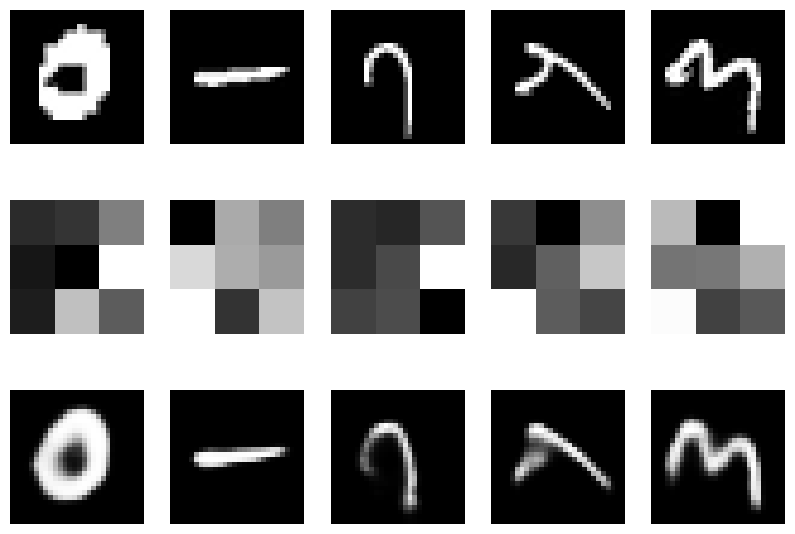

In [23]:
# obtain the original of the first 5 images
original = digits[:5]

# reshape the original images for visualization
original_vis = original.reshape(-1, 28, 28)

# obtain the encoder output of the first 5 images
encoder_2_output = encoder_2.predict(original)

# reshape the encoder output for visualization
enc_2_output_vis = encoder_2_output.reshape(-1, 3, 3) * 255

# obtain the decoder output of the first 5 images
decoder_2_output = autoencoder_2.predict(original)

# reshape the decoder output for visualization
dec_2_output_vis = decoder_2_output.reshape(-1, 28, 28) * 255

# Plot the original image, the encoder output, and the decoder output:
plt.figure(figsize=(10, 7))

for i in range(5):
    # Plot original images
    plt.subplot(3, 5, i + 1)
    plt.imshow(original_vis[i], cmap='gray')
    plt.axis('off')
    # Plot encoder output
    plt.subplot(3, 5, i + 6)
    plt.imshow(enc_2_output_vis[i], cmap='gray')
    plt.axis('off')
    # Plot decoder output
    plt.subplot(3, 5, i + 11)
    plt.imshow(dec_2_output_vis[i], cmap='gray')
    plt.axis('off')

**Discussion**
1. The decoded images cannot represent the original images satsifactorily.
2. Both third and fourth images are slightly improved but the strokes are not sharp.

## Model 3

**Discussion**
1. The number of filters is changed to 80 and 64 for the *Conv2D* layers. The number of neurons in the last *Dense* layer is updated accordingly.
2. The number of neurons in the *Dense* layers before and after the last encoding stage is also changed. 

In [24]:
# create the encoding stage
m3_enc1 = Reshape((28, 28, 1))(input_layer)
m3_enc2 = Conv2D(80, (3, 3), activation='relu', padding='same')(m3_enc1)
m3_enc3 = MaxPooling2D((2, 2), padding='same')(m3_enc2)
m3_enc4 = Conv2D(64, (3, 3), activation='relu', padding='same')(m3_enc3)
m3_enc5 = MaxPooling2D((2, 2), padding='same')(m3_enc4)
m3_enc6 = Flatten()(m3_enc5)
m3_enc7 = Dense(81, activation='relu')(m3_enc6)
m3_encoder = Dense(9, activation='relu')(m3_enc7)

# create the decoding stage
m3_dec1 = Dense(81, activation='relu')(m3_encoder)
m3_dec2 = Dense(3136, activation='relu')(m3_dec1)
m3_dec3 = Reshape((7, 7, 64))(m3_dec2)
m3_dec4 = Conv2D(64, (3, 3), activation='relu', padding='same')(m3_dec3)
m3_dec5 = UpSampling2D((2, 2))(m3_dec4)
m3_dec6 = Conv2D(80, (3, 3), activation='relu', padding='same')(m3_dec5)
m3_dec7 = UpSampling2D((2, 2))(m3_dec6)
m3_dec8 = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(m3_dec7)
m3_decoder = Reshape((784,))(m3_dec8)

# construct the autoencoder model
autoencoder_3 = Model(input_layer, m3_decoder)

# print the summary
autoencoder_3.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
reshape_6 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 80)        800       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 80)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 64)        46144     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)             

In [25]:
# compile the autoencoder model
autoencoder_3.compile(optimizer='adam', loss='binary_crossentropy')

# train the autoencoder model
autoencoder_3.fit(digits, digits, epochs=50, batch_size=32, shuffle=True, verbose=1)

Epoch 1/50
313/313 [==============================] - 30s 95ms/step - loss: 0.2034
Epoch 2/50
313/313 [==============================] - 31s 99ms/step - loss: 0.1265
Epoch 3/50
313/313 [==============================] - 30s 94ms/step - loss: 0.1148
Epoch 4/50
313/313 [==============================] - 29s 93ms/step - loss: 0.1091
Epoch 5/50
313/313 [==============================] - 30s 96ms/step - loss: 0.1052
Epoch 6/50
313/313 [==============================] - 30s 95ms/step - loss: 0.1021
Epoch 7/50
313/313 [==============================] - 30s 96ms/step - loss: 0.0998
Epoch 8/50
313/313 [==============================] - 31s 100ms/step - loss: 0.0984
Epoch 9/50
313/313 [==============================] - 30s 96ms/step - loss: 0.0968
Epoch 10/50
313/313 [==============================] - 30s 95ms/step - loss: 0.0960
Epoch 11/50
313/313 [==============================] - 30s 97ms/step - loss: 0.0950
Epoch 12/50
313/313 [==============================] - 31s 100ms/step - loss: 0.0939

In [26]:
# construct the encoder using input layer and encoding layer
encoder_3 = Model(input_layer, m3_encoder)

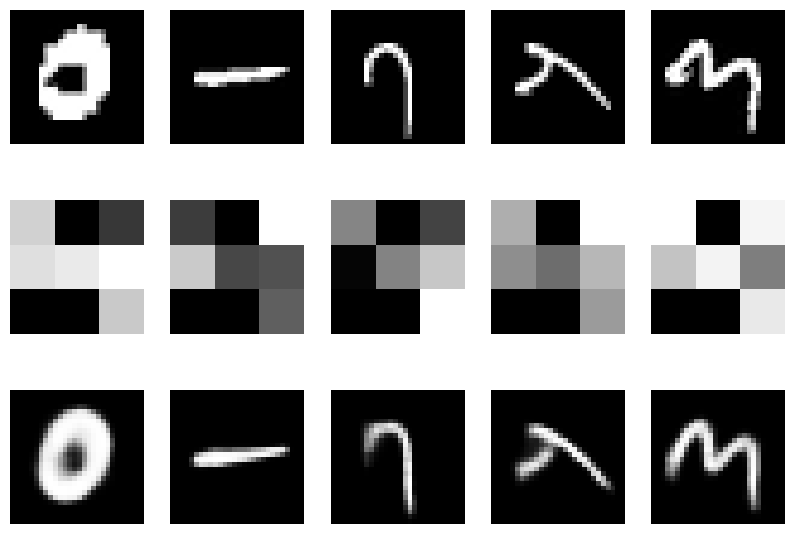

In [27]:
# obtain the original of the first 5 images
original = digits[:5]

# reshape the original images for visualization
original_vis = original.reshape(-1, 28, 28)

# obtain the encoder output of the first 5 images
encoder_3_output = encoder_3.predict(original)

# reshape the encoder output for visualization
enc_3_output_vis = encoder_3_output.reshape(-1, 3, 3) * 255

# obtain the decoder output of the first 5 images
decoder_3_output = autoencoder_3.predict(original)

# reshape the decoder output for visualization
dec_3_output_vis = decoder_3_output.reshape(-1, 28, 28) * 255

# Plot the original image, the encoder output, and the decoder output:
plt.figure(figsize=(10, 7))

for i in range(5):
    # Plot original images
    plt.subplot(3, 5, i + 1)
    plt.imshow(original_vis[i], cmap='gray')
    plt.axis('off')
    # Plot encoder output
    plt.subplot(3, 5, i + 6)
    plt.imshow(enc_3_output_vis[i], cmap='gray')
    plt.axis('off')
    # Plot decoder output
    plt.subplot(3, 5, i + 11)
    plt.imshow(dec_3_output_vis[i], cmap='gray')
    plt.axis('off')

**Discussion**
1. The decoded images can represent the original images satisfactorily.

**b. Use markdown to describe how well the autoencoder is working, making reference to the plots.**

**Discussion**
1. The autoencoder is working very nicely.
2. The first decoded image looks almost the same as the original image.
3. The second decoded image looks almost the same as the original image. The curve and the straight strokes are resembled very nicely.  
4. The third decoded image looks very much like the original image. The shape of the two strokes are restored very nicely. The only problem is intersection point of the two strokes. That intersection point should be more solid.
5. The fourth decoded image looks very much like the original image. The shape is very well maintained. The only problem is the end of the strokes is smoothened. We lost some details there.
6. The fifth decoded image looks very much like the original image. The shape is very well maintained. The problem area is the connection point. In the original image, the circle is not complete. We again lost some details at the start and end points of the stroke.
7. Overall, the autoencoder has nicely restored the original images. The shapes are well maintained and the strokes do not spread out. However, the common problem observed from the plots is that the details in the start and end of a stroke is usually being smoothened and lost.

**c. State the amount of data needed to store a single image, considering that a floating-point number is 4 bytes of data. Calculate how much memory will be saved as a percentage.**

In [28]:
# define the floating point number memory size
floating_mem_size = 4

In [29]:
# define the number of original pixels
original_pixels = digits[0].shape[0]
# print the memory size of the original image
print('Memory size of the original image: {} bytes'.format(original_pixels * floating_mem_size))

Memory size of the original image: 3136 bytes


In [30]:
# define the number of encoder output pixels
encoder_output_pixels = encoder_1_output[0].shape[0]
# print the memory size of the encoder output
print('Memory size of the encoder output: {} bytes'.format(encoder_output_pixels * floating_mem_size))

Memory size of the encoder output: 36 bytes


In [31]:
# print the memory saved as a percentage
print('Memory saved: {}%'.format((1 - (encoder_output_pixels / original_pixels)) * 100))

Memory saved: 98.85204081632652%


**Discussion**
1. Each pixel is one floating-point number, 4 bytes.
2. The original image is 28 * 28 or 784 pixels in gray scale value. To store the original image, 784 * 4 = 3136 bytes.
3. The encoded image is 3 * 3 or 9 pixels in gray scale value. To store the encoded image, 9 * 4 = 36 bytes.
4. Memory saved as a percentage is 98.85%.